In [27]:
import csv
import numpy as np
import pandas as pd
import time
import data_simulation
import plotting
import circuits
import matplotlib.pyplot as plt

Define the frequency range you want to investigate:

In [28]:
# Define the initial and final frequency values
f_start = 10**8
f_stop = 0.01
decades = 7

f_range= circuits.freq_gen(f_start, f_stop, decades)

Define the circuit you want to simulate. In this case we are goign to use a simple RC circuit. 

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/RC_circuit.png' width="300" />

In [29]:
R = 100 # ohm
C= 10E-6 #F

circuit = circuits.cir_RC(f_range[1], 100, 10E-6)

Next simulate the impedance data for the above circuit and print few lines of the dataframe. 

In [30]:
rc_response = data_simulation.rc_simulation(f_start, f_stop, decades, R, C,1) 

In [31]:
file= data_simulation.sim_rc_file_writer(f_start, f_stop, decades, R, C,1)

Text(0, 0.5, '-Z$_{imag}$ [$\\Omega$]')

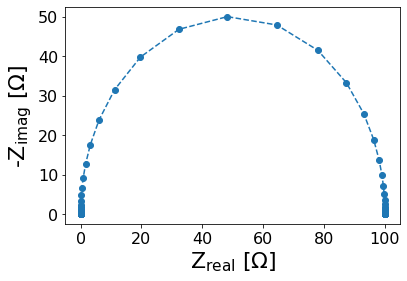

In [32]:
RC_example1 = circuits.cir_RC(w=f_range[1], R=100,C=10**-6)
fig = plt.figure()
plt.plot(RC_example1.real, -RC_example1.imag, 'o--')

plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')

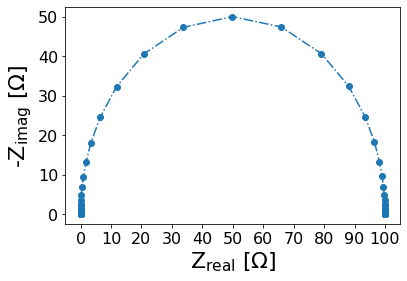

In [33]:
plt.plot(rc_response['Re_Z [Ohm]'], -rc_response['Im_Z [Ohm]'], 'o-.')
plt.xlabel('Z$_{real}$ [$\Omega$]')
plt.ylabel('-Z$_{imag}$ [$\Omega$]')
plt.xticks(np.arange(min(rc_response['Re_Z [Ohm]']), max(rc_response['Re_Z [Ohm]'])+1, 10))
plt.savefig('example.png', layout='tight',  bbox_inches='tight')

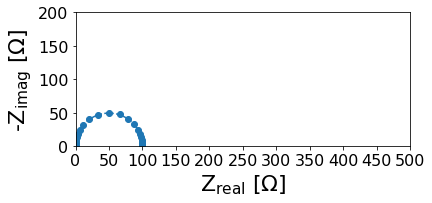

In [26]:
fig, ax = plt.subplots()
ax.plot(rc_response['Re_Z [Ohm]'], -rc_response['Im_Z [Ohm]'], 'o-.')
ax.set_xlabel('Z$_{real}$ [$\Omega$]')
ax.set_ylabel('-Z$_{imag}$ [$\Omega$]')
plt.xticks(np.arange(0,500+1, 50))
# plt.savefig('example.png', layout='tight')
ax.set_xlim([0, 500])
ax.set_ylim([0, 200])
ax.set_aspect('equal')